In [1]:
#importing libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#uploading data
cyber = pd.read_csv('/Users/inaya/Desktop/cybersecurity_attacks.csv', encoding='unicode_escape')
cyber

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 6:33,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 7:08,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 8:23,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2023-05-26 14:08,26.36.109.26,121.100.75.240,31005,6764,UDP,1428,Control,HTTP,Quibusdam ullam consequatur consequuntur accus...,...,Logged,Medium,Adira Madan,Mozilla/5.0 (iPad; CPU iPad OS 14_2_1 like Mac...,Segment A,"Nashik, Manipur",NaN,Log Data,Alert Data,Firewall
39996,2023-03-27 0:38,17.21.163.81,196.108.134.78,2553,28091,UDP,1184,Control,HTTP,Quaerat neque esse. Animi expedita natus commo...,...,Logged,High,Rati Dara,Mozilla/5.0 (Windows; U; Windows 98; Win 9x 4....,Segment C,"Vadodara, Mizoram",60.51.30.46,Log Data,NaN,Firewall
39997,2022-03-31 1:45,162.35.217.57,98.107.0.15,22505,25152,UDP,1043,Data,DNS,Enim at aspernatur illum. Saepe numquam eligen...,...,Blocked,Low,Samiha Joshi,Mozilla/5.0 (Windows; U; Windows NT 4.0) Apple...,Segment C,"Mahbubnagar, Himachal Pradesh",NaN,Log Data,Alert Data,Server
39998,2023-09-22 18:32,208.72.233.205,173.79.112.252,20013,2703,UDP,483,Data,FTP,Officiis dolorem sed harum provident earum dis...,...,Ignored,Low,Rasha Chauhan,Mozilla/5.0 (X11; Linux i686) AppleWebKit/536....,Segment B,"Rourkela, Arunachal Pradesh",137.76.130.8,Log Data,NaN,Server


In [3]:
#data inspection
cyber.head(10)
cyber.info

<bound method DataFrame.info of               Timestamp Source IP Address Destination IP Address  Source Port  \
0       2023-05-30 6:33     103.216.15.12           84.9.164.252        31225   
1       2020-08-26 7:08    78.199.217.198         66.191.137.154        17245   
2       2022-11-13 8:23      63.79.210.48          198.219.82.17        16811   
3      2023-07-02 10:38     163.42.196.10        101.228.192.255        20018   
4      2023-07-16 13:11     71.166.185.76        189.243.174.238         6131   
...                 ...               ...                    ...          ...   
39995  2023-05-26 14:08      26.36.109.26         121.100.75.240        31005   
39996   2023-03-27 0:38      17.21.163.81         196.108.134.78         2553   
39997   2022-03-31 1:45     162.35.217.57            98.107.0.15        22505   
39998  2023-09-22 18:32    208.72.233.205         173.79.112.252        20013   
39999  2023-10-10 11:59     14.102.21.108           109.198.45.7        50137

# Data Transformation/Cleaning

In [4]:
#checking for duplicated values
cyber.duplicated().any()

False

No duplicates found

In [5]:
#checking for missing values
missing_values = cyber.isnull().sum()
print(missing_values)

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64


Malware Indicators: Out of 40,000 Cyber attacks 20,000 attacks detected Indicators of Compromise (IoCs)

Alerts/Warnings:Out of 40,000 Cyber attacks 20,067 did not trigger alert

Proxy Information: Out of 40,000 Cyber attacks 19,851 missing recorded proxy server details

Firewall Logs: 19,961 cyber attacks did not log data for firewalls.

IDS/IPS Alerts: 20,050 Cyber attacks did not trigger IDS/IPS alerts

In [4]:
#replacing nulls with N/A
cyber.fillna({'Malware Indicators':'N/A','Alerts/Warnings':'N/A','Firewall Logs':'N/A','IDS/IPS Alerts':'N/A'},inplace = True)

cyber.fillna({'Proxy Information':0},inplace = True)

In [5]:
#validating if nulls are removed
cyber.isnull().sum()


Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Device Information        0
Network Segment           0
Geo-location Data         0
Proxy Information         0
Firewall Logs             0
IDS/IPS Alerts            0
Log Source                0
dtype: int64

In [6]:
#dropping unwanted columns
columns_to_drop = [
    "Source IP Address",
    "Destination IP Address",
    "Source Port",
    "Packet Length",
    "Payload Data",
    "Attack Signature",
    "User Information",
    "Device Information",
    "Network Segment",
    "Proxy Information",
    "Destination Port"
]
cyber = cyber.drop(columns=columns_to_drop, errors='ignore')

cyber.head()

,Timestamp,Protocol,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Action Taken,Severity Level,Geo-location Data,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 6:33,ICMP,Data,HTTP,IoC Detected,28.67,N/A,Malware,Logged,Low,"Jamshedpur, Sikkim",Log Data,N/A,Server
1,2020-08-26 7:08,ICMP,Data,HTTP,IoC Detected,51.50,N/A,Malware,Blocked,Low,"Bilaspur, Nagaland",Log Data,N/A,Firewall
2,2022-11-13 8:23,UDP,Control,HTTP,IoC Detected,87.42,Alert Triggered,DDoS,Ignored,Low,"Bokaro, Rajasthan",Log Data,Alert Data,Firewall
3,2023-07-02 10:38,UDP,Data,HTTP,N/A,15.79,Alert Triggered,Malware,Blocked,Medium,"Jaunpur, Rajasthan",N/A,Alert Data,Firewall
4,2023-07-16 13:11,TCP,Data,DNS,N/A,0.52,Alert Triggered,DDoS,Blocked,Low,"Anantapur, Tripura",N/A,Alert Data,Firewall


In [7]:
#correcting the data types for columns and validating if data types got changed

cyber['Timestamp'] = pd.to_datetime(cyber['Timestamp'])
categorical_columns = ['Protocol', 'Packet Type', 'Traffic Type', 'Action Taken', 'Severity Level',
                       'Malware Indicators','Alerts/Warnings','Attack Type','Geo-location Data','Firewall Logs','IDS/IPS Alerts', 'Log Source']
cyber[categorical_columns] = cyber[categorical_columns].astype('category')

cyber['Anomaly Scores'] = cyber['Anomaly Scores'].astype(float)

data_types = cyber.dtypes
print(data_types)


Timestamp             datetime64[ns]
Protocol                    category
Packet Type                 category
Traffic Type                category
Malware Indicators          category
Anomaly Scores               float64
Alerts/Warnings             category
Attack Type                 category
Action Taken                category
Severity Level              category
Geo-location Data           category
Firewall Logs               category
IDS/IPS Alerts              category
Log Source                  category
dtype: object


# Temporal Trend Analysis

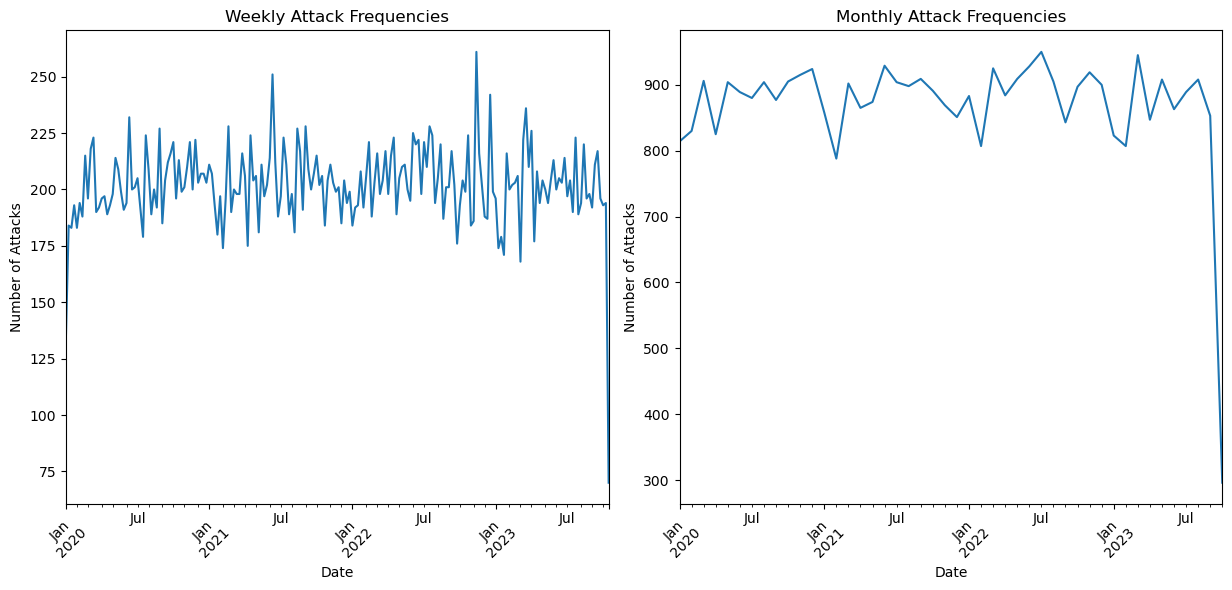

In [10]:
cyber.set_index('Timestamp', inplace=True)
weekly_attacks = cyber.resample('W').size()
monthly_attacks = cyber.resample('M').size()
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 2)
weekly_attacks.plot(title='Weekly Attack Frequencies', xlabel='Date', ylabel='Number of Attacks')
plt.xticks(rotation=45)
plt.subplot(1, 3, 3)
monthly_attacks.plot(title='Monthly Attack Frequencies', xlabel='Date', ylabel='Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Weekly Attack Frequencies Plot:

Spikes: Certain weeks show pronounced spikes in activity. These could correspond to specific vulnerabilities being exploited. It would be worth investigating what events or changes occurred during those times to explain the peaks.

Trends: There doesn't appear to be a clear upward or downward trend over the years, suggesting that the frequency of attacks is relatively stable over time, with periodic bursts of increased activity.

Monthly Attack Frequencies Plot:

Consistency: The number of attacks each month stays within a certain range, with no extreme deviations. This suggests a consistent level of attack attempts over the months.

Outliers: There are no extreme outliers on the monthly scale, which might suggest that any spikes observed on the weekly scale are short-lived and do not affect the overall monthly statistics significantly.

# Protocol and Traffic Type Analysis

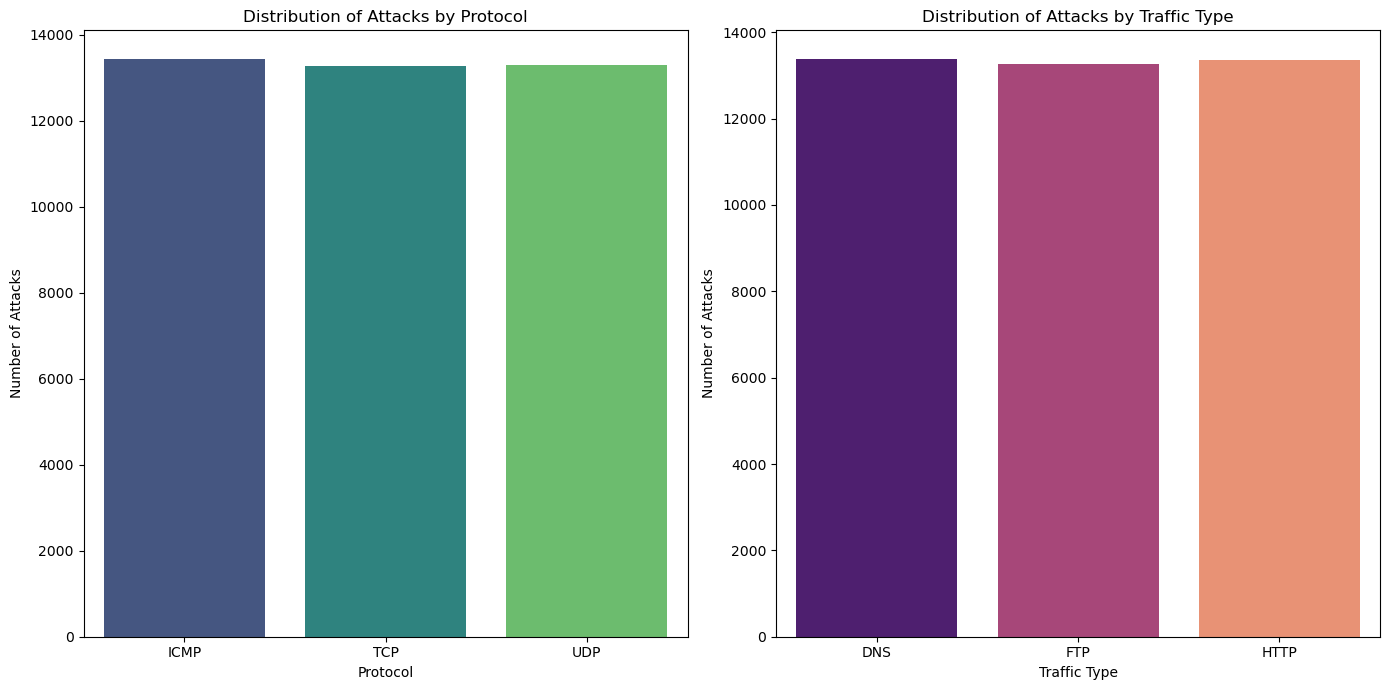

In [11]:
protocol_counts = cyber['Protocol'].value_counts()


traffic_type_counts = cyber['Traffic Type'].value_counts()


plt.figure(figsize=(14, 7))


plt.subplot(1, 2, 1)
sns.barplot(x=protocol_counts.index, y=protocol_counts.values, palette="viridis")
plt.title('Distribution of Attacks by Protocol')
plt.xlabel('Protocol')
plt.ylabel('Number of Attacks')


plt.subplot(1, 2, 2)
sns.barplot(x=traffic_type_counts.index, y=traffic_type_counts.values, palette="magma")
plt.title('Distribution of Attacks by Traffic Type')
plt.xlabel('Traffic Type')
plt.ylabel('Number of Attacks')

plt.tight_layout()
plt.show()

No Single Focus: Attackers are not focusing on a single protocol or traffic type, indicating a broad range of attack vectors being employed.

Uniform Distribution: The attacks are fairly evenly distributed across the three protocols (ICMP, TCP, UDP), with TCP and UDP being slightly more targeted than ICMP.

DNS and HTTP Targeted: DNS and HTTP traffic types are the most targeted. This is likely due to the critical role DNS plays in the functioning of the internet and HTTP being the foundation of data communication for the World Wide Web, making them attractive targets for disruption or interception.

# Attack Type Distribution:

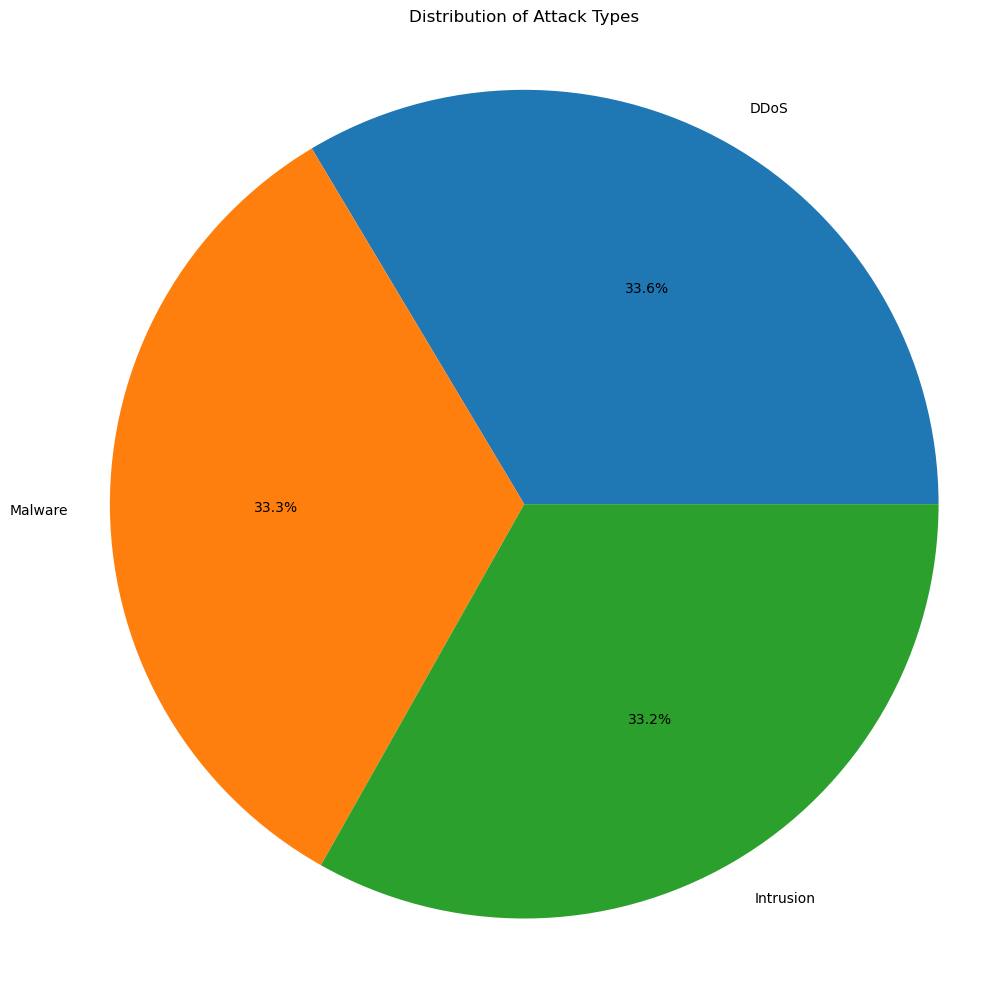

In [12]:
attack_type_counts = cyber['Attack Type'].value_counts()


plt.figure(figsize=(10, 10))
plt.pie(attack_type_counts, labels=attack_type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Attack Types')
plt.axis('equal')  
plt.tight_layout()  
plt.show()

# Attack distribution accross various regions

In [13]:
# Split the 'Geo-location Data' column into two new columns 'City' and 'State'
cyber[['City', 'State']] = cyber['Geo-location Data'].str.split(',', expand=True)

# Check the first few rows to verify that the split was successful
print(cyber.head())


                    Protocol Packet Type Traffic Type Malware Indicators  \
Timestamp                                                                  
2023-05-30 06:33:00     ICMP        Data         HTTP       IoC Detected   
2020-08-26 07:08:00     ICMP        Data         HTTP       IoC Detected   
2022-11-13 08:23:00      UDP     Control         HTTP       IoC Detected   
2023-07-02 10:38:00      UDP        Data         HTTP                N/A   
2023-07-16 13:11:00      TCP        Data          DNS                N/A   

                     Anomaly Scores  Alerts/Warnings Attack Type Action Taken  \
Timestamp                                                                       
2023-05-30 06:33:00           28.67              N/A     Malware       Logged   
2020-08-26 07:08:00           51.50              N/A     Malware      Blocked   
2022-11-13 08:23:00           87.42  Alert Triggered        DDoS      Ignored   
2023-07-02 10:38:00           15.79  Alert Triggered     Malwa

In [14]:
#dropping the Geo-location Data column
cyber = cyber.drop(columns= 'Geo-location Data', errors='ignore')

cyber.head()

,Protocol,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Action Taken,Severity Level,Firewall Logs,IDS/IPS Alerts,Log Source,City,State
Timestamp,,,,,,,,,,,,,,
2023-05-30 06:33:00,ICMP,Data,HTTP,IoC Detected,28.67,N/A,Malware,Logged,Low,Log Data,N/A,Server,Jamshedpur,Sikkim
2020-08-26 07:08:00,ICMP,Data,HTTP,IoC Detected,51.50,N/A,Malware,Blocked,Low,Log Data,N/A,Firewall,Bilaspur,Nagaland
2022-11-13 08:23:00,UDP,Control,HTTP,IoC Detected,87.42,Alert Triggered,DDoS,Ignored,Low,Log Data,Alert Data,Firewall,Bokaro,Rajasthan
2023-07-02 10:38:00,UDP,Data,HTTP,N/A,15.79,Alert Triggered,Malware,Blocked,Medium,N/A,Alert Data,Firewall,Jaunpur,Rajasthan
2023-07-16 13:11:00,TCP,Data,DNS,N/A,0.52,Alert Triggered,DDoS,Blocked,Low,N/A,Alert Data,Firewall,Anantapur,Tripura


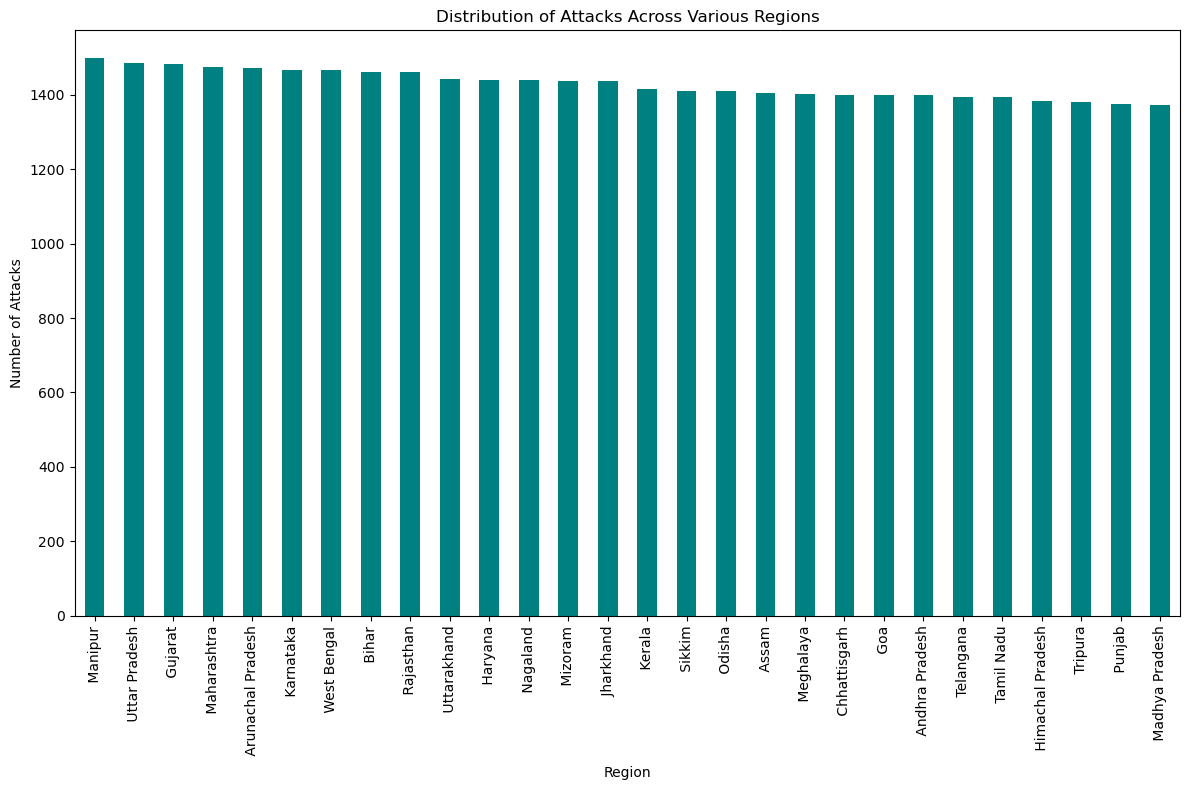

In [15]:
region_counts = cyber['State'].value_counts()


plt.figure(figsize=(12, 8))
region_counts.plot(kind='bar', color='teal')
plt.title('Distribution of Attacks Across Various Regions')
plt.xlabel('Region')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

Uniform Distribution: The number of attacks appears relatively uniform across the regions, suggesting that cyber threats are widespread and not confined to a specific area.

Further Analysis Needed: While the number of attacks is evenly spread out, the severity and type of attacks might differ by region. A deeper analysis could provide more detailed insights.

# State-wise distribution of attack security levels

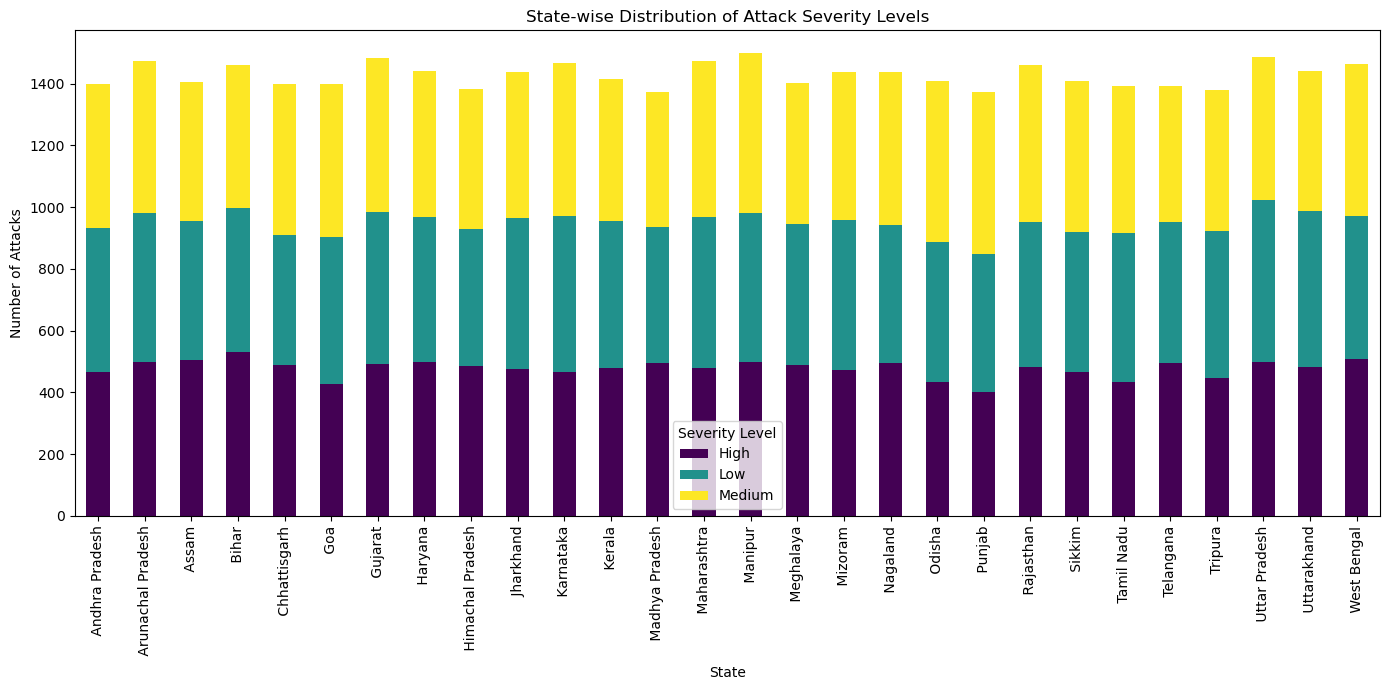

In [16]:
severity_counts = cyber.groupby(['State', 'Severity Level']).size().reset_index(name='Count')

# Pivot the data for better plotting using Seaborn
severity_pivot = severity_counts.pivot(index='State', columns='Severity Level', values='Count')

# Plotting the data with a stacked bar chart
severity_pivot.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')
plt.title('State-wise Distribution of Attack Severity Levels')
plt.xlabel('State')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=90)  # Rotate the x labels for better readability
plt.tight_layout()  # Adjust the padding between and around subplots
plt.legend(title='Severity Level')
plt.show()

Uniform Distribution of Severity Levels: Each state appears to experience a relatively uniform distribution of attack severity levels, with medium severity attacks being the most common across all states.

Prevalence of Medium Severity Attacks: The prevalence of medium severity attacks suggests that while most attacks may not be critically threatening, they still possess the potential to cause significant disruptions and therefore should not be overlooked.

High Severity Attacks: States exhibit a consistent but lesser frequency of high severity attacks compared to medium and low severity attacks. This indicates that while less frequent, the potential for severe incidents exists across all regions.

Low Severity Attacks: The number of low severity attacks is the smallest category in each state, which might suggest effective filtering of minor threats or a tendency for only more serious attacks to be recorded and categorized.

# Action taken analysis

Action Taken    Blocked  Ignored  Logged
Severity Level                          
High               4530     4460    4392
Low                4481     4409    4293
Medium             4518     4407    4510


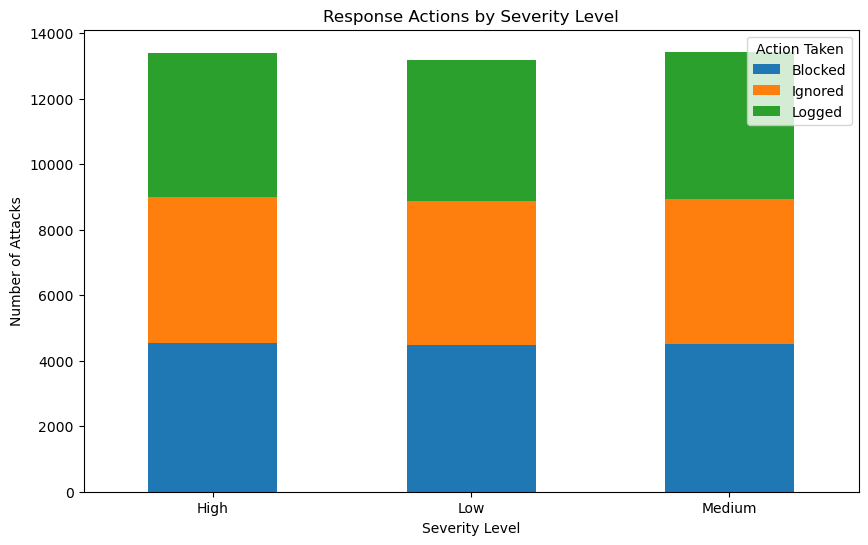

In [21]:
severity_action_crosstab = pd.crosstab(cyber['Severity Level'], cyber['Action Taken'])

print(severity_action_crosstab)

severity_action_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Response Actions by Severity Level')
plt.xlabel('Severity Level')
plt.ylabel('Number of Attacks')
plt.legend(title='Action Taken')
plt.xticks(rotation=0)
plt.show()

High Severity Response: For high severity attacks, the numbers are nearly equal across all response actions. This might suggest that high severity attacks are given a comprehensive treatment where they are blocked, logged for further analysis, and possibly ignored if they are assessed as false positives or if the system is designed to ignore after blocking/logging.

Consistent Treatment of Medium and Low Severities: Medium and low severity attacks receive a similar distribution of responses as high severity attacks. Ideally, we would expect a higher number of blocks for high severity and more logs for medium and low severity attacks to analyze them further.

Action Taken Strategy: The data suggests that the action taken might not be adequately prioritized based on the severity of the attack, or it could indicate a highly automated response system that treats all perceived threats with equal priority.